<a href="https://colab.research.google.com/github/lillianpoland/hi-class/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

Yes, elpd_loo is still meaningful if we only have one model.

Elpd_loo measures how well the model predicts new data. It balances predictive accuracy and complexity to avoid overfitting, leading to larger (less negative) elpd_loo values showing better performance.

If you compute elpd_loo for one model you are able to check if your model is likely to work well on new data (out-of-sample). This is valuable for assessing its reliability and generalizability. You can also look at individual components to identify outliers or points that the model does not capture well.

Without having a second model, you don't have context unless you compare it to a meaningful benchmark.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model focuses on the training data too well, but does not base it on general patterns that apply to the real world and unseen data. This will perform well on the training data, but poorly on new data.

Overfitting happens when a model has too many parameters, leading to the model fitting the training data exactly, including random errors. This can also happen when there isn't enough data to represent the problem and when the model isn't guided to stay simple.

This is noticible when the model does really well with training data, but badly with new data.


**Task3**:

How do we mitigate overfitting?

The absolute best way to avoid overfitting is to have priors. This is helpful because it guides the model to focus on realistic solutions. This prevents the model from choosing really complex solutions.

Another way to mitigate overfitting is to use more data, so the model can understand the realistic patterns instead of overfitting small quirks. Another solution would be simplifying the model so they are less likely to memorize noise (random errors, outliers, irrelevant information).

**Task4**:

How do we mitigate underfitting?

Underfitting happens when a model is too simple to capture the underlying patterns in the data. As a result, it performs poorly on the training data and new data because it hasn't learned enough about the relationships in the data.

To mitigate underfitting you can try to use a more complex model, for example move from linear regression to polynomial regression for nonlinear data. If your data is undersampled you can try to mitigate underfitting by using more data. This could prevent the model from failing to identify patterns that only emerge with more data.

**Task5**:

Why would we want more than one predictor in a model?

We would want more than one predictor in a model because most real-world problems are influenced by multiple factors. Including more than one predictors helps the model understand the relationships in the data better.

Using more than one predictor is helpful because it improves accuracy. A single predictor might only explain part of the variation, but adding more can capture additional patterns.

Using multiple predictors can also help with bias, as using only one might lead to an oversimplified model. With multiple predictors, the model will consider all key influences.

**Task6**:

Can we have too many predictors? How would we now?

Yes, having too many predictors could be a problem. When there are too many predictors, the model can become more complex, leading to overfitting and other issues. If there are too many predictors, the model could focus on the training data and learn the noise, in such a way that it will not model new data well (overfitting). There could also be overlap with the predictors which can confuse the model about what is actually important.

We can tell we have too many predictors by looking at if the model works with training data, but does not work on new data (overfitting). If we notice unstable results, where small changes in the data cause big changes in the output, having too many predictors could be the problem.

**Task7**:

What is variable selection, and how does it work?

Variable selection is when you choose which variables to include in a model. You should identify the most relevant predictors that help make the best predictions. This is important because it improves the accuracy of the model by focusing on the most important information, prevents overfitting so the model is less likely to focus on the training data, and reduce complexity that would confuse the model.

Variable selection works by evaluating the relevance of each feature independently from the model. Choosing the most important ones allow this to work so your model works best.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

####Standard:
In this model, you include both continuous and categorical variables seperately in the model. You would assume they don't affect each other and use this model when they don't affect each other. This is different from the 2nd and 3rd models because this model assumes the variables don't affect each other and therefore dont have a combined impact.

When to use: use if variables dont affect each other.

####Using categorical variable:
In this model, you can assume that the effect of the continuous variable could change depending on the category. For example, age might affect income differently for men and women. You would use this if you believe the effect is different based on category. This model is different from the 1st one because it assumes the continuous variable has some sort of impact from the category, whereas the one before assumes there is no affect.

When to use: Use if the effect of the continuous variable changes for each category.

####Adding variables + etc:
This is similar to the model before, but in this one you explicitely how the continuous variable and categorical variable work together to effect the target. So, this looks at their combined effect. You would use this over model #2 when you think the way the variables work together is important. This model is different from the 1st model in the same way the 2nd is different, as the variables are assumed to have combined effects. However, this is different from model #2 because it focuses on the combined effects and decides they are important.

When to use: Use if the variables' combined effects are important.




**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We can visualize multiple linear regression models by making interaction plots which explore how the predictors influence the outcome variable. They show the relationship between one predictor and the outcome changes depending on the value of the predictor. We can also use residual plots which assess whether the model fits the data well. These plots show the differences between the observed data points and the model's predictions. Ideally, residuals should look random and evenly distributed. So, if they show a pattern, this means the model isn't capturing some part of the data.

It can be hard to visualize multiple linear regression models because the complexity increases with the number of predictors, especially when they include both continuous and categorical variables. If there are interactions between the predictors, the model becomes even more complex, adding to the difficulty to visualize. So, directly we cannot visualize the entire model all at once, because the graph would be overwhelmed with all the visual complexity. However, if you seperate the model's behavior into smaller components it is possible.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [4]:

!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.4 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [6]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [7]:
ft_pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

In [8]:
ft_pos_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 221 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [9]:
ft_pos_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

In [10]:
ft_pos_3pt_inter = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

In [11]:
ft_pos_3pt_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

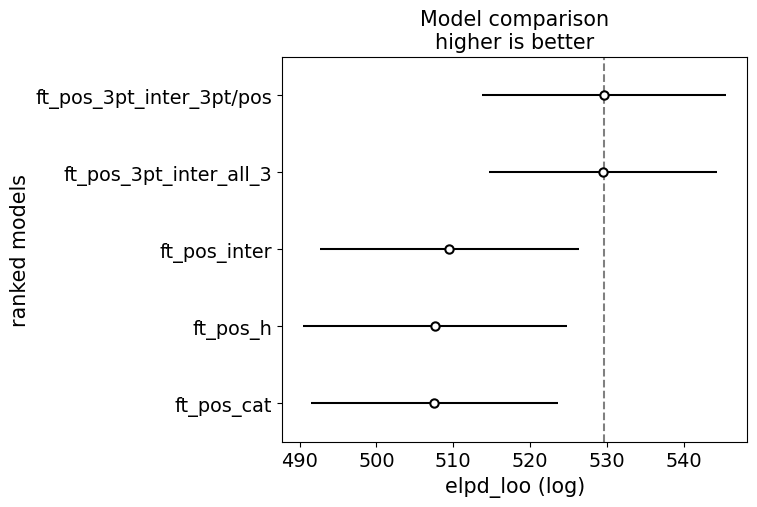

In [12]:
compare = az.compare({"ft_pos_cat":ft_pos_cat, "ft_pos_h":ft_pos_h, "ft_pos_inter":ft_pos_inter, "ft_pos_3pt_inter_all_3":ft_pos_3pt_inter, "ft_pos_3pt_inter_3pt/pos":ft_pos_3pt_inter2})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The models that include 3 point attempts are the "best" among the compared models. Between the 2 with three-point attempts, the one that includes only interactions between 3PA and Pos is better than the one with interactions among all three predictors. This is shown by the highest elpd_loo value and the lowest rank in the comparison plot from task 10. This modely likely performs the best because it incorporates information about 3 point attempts and their interaction with a player's position, which are important factors in determining a basketball player's percentage. This is probably becuase players that attempt more 3 point shots are most likely better at scoring anyway as the more 3 point attempts you make, the more practice you get at shooting, which in turn improves your skill.